# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
from skimage.io import imread

from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [2]:
class_names = ["buildings", "forest", "glacier", "mountain", "sea", "street"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [4]:
os.getcwd() + "\\data\\seg_train"

'd:\\Bootcamp\\Carpeta_profesor\\2405_dsft_thebridge\\2_Machine_Learning\\3-Deep_Learning\\2-Redes_Convolucionales\\ejercicios\\data\\seg_train'

In [6]:
os.listdir(os.getcwd() + "\\data\\seg_train")

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [7]:
IMAGE_SIZE = (32,32)
TRAIN_PATH = os.getcwd() + "\\data\\seg_train"
TEST_PATH = os.getcwd() + "\\data\\seg_test"

In [14]:
def read_data(path, im_size):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            try:
                image = imread(image_path)
                smallimage = cv2.resize(image, im_size)
                X.append(smallimage)
                y.append(label)
            except:
                print("Error en la lectura de la imagen", image_path)
            
    return np.array(X), np.array(y)

In [9]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE)

In [15]:
PRUEBA_PATH = os.getcwd() + "\\prueba"

X_prueba, y_prueba = read_data(PRUEBA_PATH, IMAGE_SIZE)

Error en la lectura de la imagen d:\Bootcamp\Carpeta_profesor\2405_dsft_thebridge\2_Machine_Learning\3-Deep_Learning\2-Redes_Convolucionales\ejercicios\prueba\buildings\Clasificador_paisajes.ipynb


In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 32, 32, 3)
(3000, 32, 32, 3)
(14034,)
(3000,)


In [36]:
pd.Series(y_train).value_counts()

3    2512
2    2404
5    2382
4    2274
1    2271
0    2191
dtype: int64

In [37]:
pd.Series(y_test).value_counts()

2    553
3    525
4    510
5    501
1    474
0    437
dtype: int64

In [16]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test= shuffle(X_test, y_test, random_state=42)

In [19]:
y_train[:10]

array([0, 5, 5, 4, 3, 2, 3, 3, 0, 5])

forest


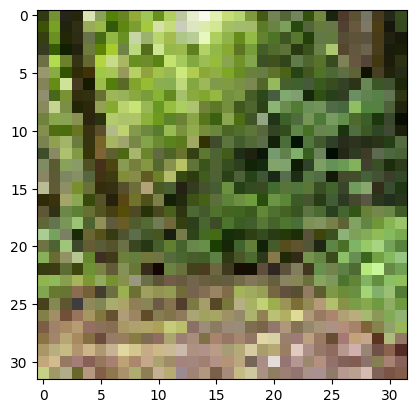

In [22]:
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index])

In [23]:
X_train

array([[[[225, 225, 225],
         [221, 223, 222],
         [221, 223, 222],
         ...,
         [237, 237, 237],
         [238, 238, 238],
         [240, 240, 240]],

        [[230, 230, 230],
         [227, 227, 227],
         [232, 232, 232],
         ...,
         [244, 244, 244],
         [244, 244, 244],
         [246, 246, 246]],

        [[ 55,  55,  55],
         [223, 223, 223],
         [ 88,  87,  88],
         ...,
         [245, 245, 245],
         [246, 246, 246],
         [246, 246, 246]],

        ...,

        [[114, 112, 111],
         [ 97,  96,  94],
         [125, 123, 124],
         ...,
         [ 90,  89,  87],
         [ 88,  87,  85],
         [ 92,  91,  89]],

        [[153, 152, 150],
         [113, 112, 110],
         [123, 121, 122],
         ...,
         [ 83,  82,  79],
         [ 68,  67,  65],
         [ 80,  79,  77]],

        [[131, 130, 128],
         [133, 132, 130],
         [128, 126, 125],
         ...,
         [128, 127, 125],
        

In [25]:
print(X_train.min())
print(X_train.max())

0
255


In [26]:
X_train = X_train/255
X_test = X_test/255

In [27]:
print(X_train.min())
print(X_train.max())

0.0
1.0


In [28]:
X_train.shape

(14034, 32, 32, 3)

In [31]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Dense(16),
    keras.layers.Dense(6, activation="softmax")
])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [34]:
64 * (3*3) * 3 + 64

1792

In [35]:
32 * (3*3) * 64 + 32

18464

In [39]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [41]:
14034 * 0.8 / 128

87.7125

In [42]:
history = model.fit(X_train,
                    y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.2)

Epoch 1/20


88/88 [==============================] - 9s 81ms/step - loss: 1.2099 - accuracy: 0.5253 - val_loss: 1.0417 - val_accuracy: 0.5907
Epoch 2/20
88/88 [==============================] - 6s 73ms/step - loss: 0.9460 - accuracy: 0.6463 - val_loss: 0.8879 - val_accuracy: 0.6651
Epoch 3/20
88/88 [==============================] - 7s 80ms/step - loss: 0.8511 - accuracy: 0.6882 - val_loss: 0.8751 - val_accuracy: 0.6669
Epoch 4/20
88/88 [==============================] - 7s 76ms/step - loss: 0.8022 - accuracy: 0.7063 - val_loss: 0.8360 - val_accuracy: 0.6926
Epoch 5/20
88/88 [==============================] - 7s 79ms/step - loss: 0.7796 - accuracy: 0.7183 - val_loss: 0.8360 - val_accuracy: 0.6915
Epoch 6/20
88/88 [==============================] - 7s 79ms/step - loss: 0.7268 - accuracy: 0.7391 - val_loss: 0.7960 - val_accuracy: 0.7146
Epoch 7/20
88/88 [==============================] - 6s 71ms/step - loss: 0.6984 - accuracy: 0.7494 - val_loss: 0.8122 - val_accuracy: 0.7029
Epoch 8/20


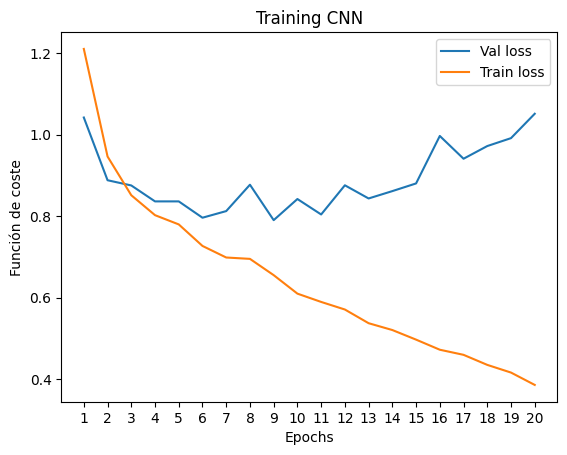

In [48]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,21))
plt.plot(df_hist['val_loss'], label="Val loss")
plt.plot(df_hist['loss'], label="Train loss")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Función de coste")
plt.xticks(np.arange(1,21));
plt.legend()

In [50]:
results = model.evaluate(X_test, y_test)

94/94 [==============================] - 1s 6ms/step - loss: 1.0360 - accuracy: 0.6960


In [51]:
IMAGE_SIZE = (64,64)

In [52]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE)

In [53]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test= shuffle(X_test, y_test, random_state=42)

In [54]:
X_train = X_train/255
X_test = X_test/255

In [55]:
print(X_train.shape)

(14034, 64, 64, 3)


In [56]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(16),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(6, activation="softmax")
])

In [57]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [58]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)

In [59]:
history = model.fit(X_train,
                    y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.2,
                    callbacks = [early_stopping])

Epoch 1/20
88/88 [==============================] - 30s 320ms/step - loss: 1.3500 - accuracy: 0.4814 - val_loss: 1.1012 - val_accuracy: 0.5846
Epoch 2/20
88/88 [==============================] - 26s 297ms/step - loss: 1.0449 - accuracy: 0.6139 - val_loss: 0.8885 - val_accuracy: 0.6797
Epoch 3/20
88/88 [==============================] - 28s 323ms/step - loss: 0.9467 - accuracy: 0.6523 - val_loss: 0.8453 - val_accuracy: 0.6933
Epoch 4/20
88/88 [==============================] - 30s 338ms/step - loss: 0.8901 - accuracy: 0.6737 - val_loss: 0.8324 - val_accuracy: 0.7136
Epoch 5/20
88/88 [==============================] - 31s 357ms/step - loss: 0.8153 - accuracy: 0.7070 - val_loss: 0.8130 - val_accuracy: 0.6872
Epoch 6/20
88/88 [==============================] - 29s 334ms/step - loss: 0.7554 - accuracy: 0.7268 - val_loss: 0.8100 - val_accuracy: 0.7079
Epoch 7/20
88/88 [==============================] - 27s 309ms/step - loss: 0.7498 - accuracy: 0.7286 - val_loss: 0.7582 - val_accuracy: 0.7360

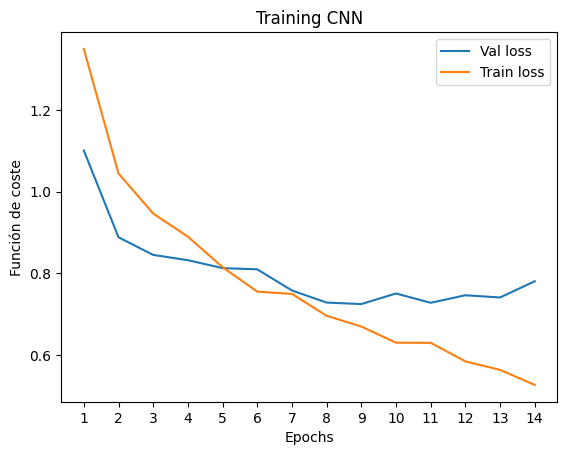

In [60]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,15))
plt.plot(df_hist['val_loss'], label="Val loss")
plt.plot(df_hist['loss'], label="Train loss")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Función de coste")
plt.xticks(np.arange(1,15));
plt.legend()

In [61]:
results = model.evaluate(X_test, y_test)

94/94 [==============================] - 2s 19ms/step - loss: 0.7640 - accuracy: 0.7447


In [62]:
y_pred = model.predict(X_test)
y_pred.round(2)

94/94 [==============================] - 2s 18ms/step


array([[0.03, 0.  , 0.48, 0.47, 0.02, 0.  ],
       [0.  , 0.  , 0.9 , 0.01, 0.08, 0.01],
       [0.  , 0.  , 0.01, 0.59, 0.4 , 0.  ],
       ...,
       [0.  , 0.  , 0.16, 0.52, 0.32, 0.  ],
       [0.  , 0.  , 0.01, 0.03, 0.96, 0.  ],
       [0.02, 0.27, 0.22, 0.01, 0.01, 0.46]], dtype=float32)

mountain


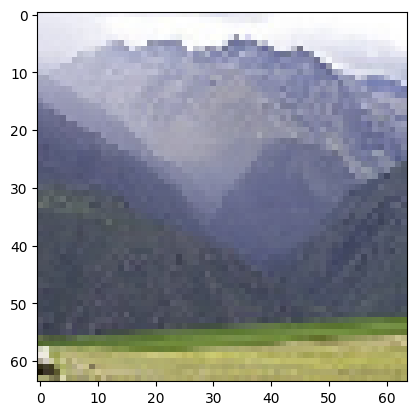

In [63]:
print(class_names[y_test[0]])
plt.imshow(X_test[0])

In [64]:
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [65]:
pred_labels = np.argmax(y_pred, axis=1)
print(pred_labels)
pred_names = [class_names[pred] for pred in pred_labels]
print(pred_names)

[2 2 3 ... 3 4 5]
['glacier', 'glacier', 'mountain', 'buildings', 'street', 'glacier', 'glacier', 'sea', 'buildings', 'street', 'sea', 'buildings', 'street', 'sea', 'street', 'forest', 'glacier', 'forest', 'street', 'sea', 'street', 'buildings', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'buildings', 'glacier', 'glacier', 'mountain', 'forest', 'street', 'buildings', 'forest', 'glacier', 'street', 'street', 'glacier', 'mountain', 'buildings', 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'sea', 'buildings', 'glacier', 'glacier', 'sea', 'buildings', 'mountain', 'buildings', 'street', 'glacier', 'forest', 'buildings', 'glacier', 'forest', 'forest', 'street', 'street', 'street', 'glacier', 'glacier', 'glacier', 'street', 'forest', 'mountain', 'street', 'street', 'mountain', 'glacier', 'forest', 'sea', 'street', 'sea', 'mountain', 'mountain', 'sea', 'forest', 'glacier', 'buildings', 'buildings', 'street', 'glacier', 'mountain', 'street', 'buildings', 'mountain'

<Axes: >

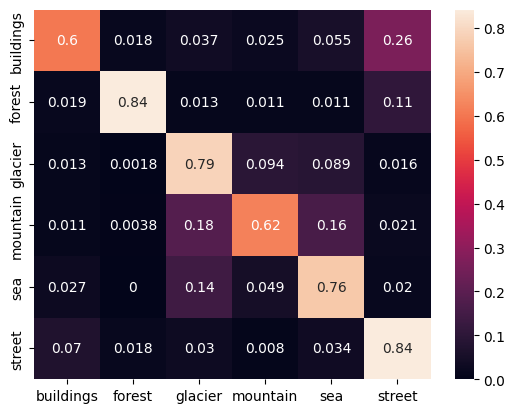

In [66]:
c_mat = confusion_matrix(y_test, pred_labels, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.79      0.60      0.68       437
           1       0.95      0.84      0.89       474
           2       0.68      0.79      0.73       553
           3       0.77      0.62      0.69       525
           4       0.69      0.76      0.72       510
           5       0.68      0.84      0.75       501

    accuracy                           0.74      3000
   macro avg       0.76      0.74      0.75      3000
weighted avg       0.76      0.74      0.74      3000



In [2]:
# model.predict(X_test[100])